# 10. Линейная регрессия

In [1]:
import pandas as pd
df = pd.read_csv('data/Spotify_Youtube.csv')
df.columns

Index(['Unnamed: 0', 'Artist', 'Url_spotify', 'Track', 'Album', 'Album_type',
       'Uri', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'official_video', 'Stream'],
      dtype='object')

In [2]:
# миллисекунды в секунды
df['Duration'] = df['Duration_ms'] / 1000

In [3]:
# исключить все треки, которые длятся меньше 30 секунд и больше 300 секунд
# чтобы избежать выбросов — влияния нетипичных песен на результаты регрессии
df = df[(df['Duration'] < 300) & (df['Duration'] > 30)]

In [4]:
df = df[['Duration', 'Danceability', 'Loudness', 'Speechiness', 'Energy']].dropna()
print(df.describe())

           Duration  Danceability      Loudness   Speechiness        Energy
count  18646.000000  18646.000000  18646.000000  18646.000000  18646.000000
mean     206.110522      0.626312     -7.536997      0.097840      0.638738
std       45.703952      0.161589      4.577807      0.113562      0.213155
min       30.985000      0.000000    -46.251000      0.000000      0.000055
25%      176.144000      0.527000     -8.649750      0.035900      0.511000
50%      207.264500      0.643000     -6.422000      0.051300      0.670000
75%      237.559000      0.744000     -4.860000      0.107000      0.801000
max      299.960000      0.975000      0.920000      0.964000      1.000000


### Моделирование

In [5]:
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS

In [6]:
X = df[['Danceability', 'Loudness', 'Speechiness', 'Energy']]
Y = df['Duration']

# добавляем b_0 (константу)
X = sm.add_constant(X, prepend=False)

C:\Users\anike\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [7]:
model = OLS(Y, X)
res = model.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:               Duration   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     225.9
Date:                Sun, 13 Aug 2023   Prob (F-statistic):          1.01e-189
Time:                        17:08:30   Log-Likelihood:                -97284.
No. Observations:               18646   AIC:                         1.946e+05
Df Residuals:                   18641   BIC:                         1.946e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Danceability   -27.5230      2.208    -12.463   

* $R-squared$ — коэффициент детерминации;
* колонка $coef$ с коэффициентами $b$;
* колонка $P > |t|$ , $p-value$ — используем для оценки значимости коэффициента.

$p-value$ у переменной $Energy$ незначим (он больше $0.05$). Значит, мы исключим её из модели.

In [8]:
X = df[['Danceability', 'Loudness', 'Speechiness']]
Y = df['Duration']
 
X = sm.add_constant(X, prepend=False)
 
model = OLS(Y, X)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               Duration   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     300.2
Date:                Sun, 13 Aug 2023   Prob (F-statistic):          2.43e-190
Time:                        17:08:30   Log-Likelihood:                -97286.
No. Observations:               18646   AIC:                         1.946e+05
Df Residuals:                   18642   BIC:                         1.946e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Danceability   -27.2695      2.204    -12.375   

C:\Users\anike\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


После удаления $Energy$ коэффициент детерминации совсем не изменился. Это показывает, что переменная $Energy$ совсем никак не объясняла изменчивость нашей зависимой переменной. 

**«Энергичность» песни никак не влияет на её длительность.**

Модель с единственной независимой переменной (связь между длительностью и танцевальностью песни). 

Понять, насколько добавление дополнительных переменных оказалось полезным

In [9]:
X = df[['Danceability']]
Y = df['Duration']
 
X = sm.add_constant(X, prepend=False)
 
model = OLS(Y, X)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               Duration   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     49.39
Date:                Sun, 13 Aug 2023   Prob (F-statistic):           2.17e-12
Time:                        17:08:30   Log-Likelihood:                -97701.
No. Observations:               18646   AIC:                         1.954e+05
Df Residuals:                   18644   BIC:                         1.954e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Danceability   -14.5388      2.069     -7.028   

C:\Users\anike\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Коэффициент детерминации стал значительно меньше **(0.003 вместо 0.046)** — от дополнительных переменных ($Loudness$ и $Speechiness$) всё же была польза.

### Проверка допущений

In [10]:
X = df
X

,Duration,Danceability,Loudness,Speechiness,Energy
0,222.640,0.818,-6.679,0.1770,0.705
1,200.173,0.676,-5.815,0.0302,0.703
2,215.150,0.695,-3.930,0.0522,0.923
3,233.867,0.689,-5.810,0.0260,0.739
5,245.000,0.760,-5.852,0.0372,0.891
...,...,...,...,...,...
20713,94.667,0.582,-6.344,0.0328,0.926
20714,150.857,0.531,-1.786,0.1370,0.936
20715,136.842,0.443,-4.679,0.0647,0.830
20716,108.387,0.417,-4.004,0.4190,0.767


Значение $vif$ выше 10 указывает на высокую корреляцию с другими независимыми переменными

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
 
X = df[['Danceability', 'Loudness', 'Speechiness', 'Energy']]
X = df[['Danceability', 'Loudness', 'Speechiness']]
 
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

 
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

# Energy высоко скоррелированна с другими переменными

        feature       VIF
0  Danceability  3.283729
1      Loudness  2.593200
2   Speechiness  1.822876


# Crimes - 2001 to Present

преступления в Чикаго с 2001 по настоящее время

In [12]:
import pandas as pd
df = pd.read_csv("data/Crimes_2015.csv")
df.head()

,Dates,Primary Type,Location Description,Arrest,Domestic,Ward,Counts,District,Primary Types
0,2015-09-05,BATTERY,RESIDENCE,0,1,12.0,498,9,2
1,2015-09-04,THEFT,CTA BUS,0,0,29.0,179,15,29
2,2015-09-05,NARCOTICS,SIDEWALK,1,0,35.0,498,14,17
3,2015-09-05,ASSAULT,APARTMENT,0,1,28.0,498,15,1
4,2015-09-05,BURGLARY,RESIDENCE,0,0,21.0,498,6,3


In [13]:
# самый частый тип совершения преступления, занесенный в базу
print(df["Primary Type"].value_counts().index[0])

THEFT


In [14]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16649 entries, 0 to 16648
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Dates                 16649 non-null  object 
 1   Primary Type          16649 non-null  object 
 2   Location Description  16649 non-null  object 
 3   Arrest                16649 non-null  int64  
 4   Domestic              16649 non-null  int64  
 5   Ward                  16649 non-null  float64
 6   Counts                16649 non-null  int64  
 7   District              16649 non-null  int64  
 8   Primary Types         16649 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 1.1+ MB
None


In [15]:
df.dropna(how = 'any', inplace = True)
print(df['Counts'].sum())

10342076


In [16]:
# df.isnull()

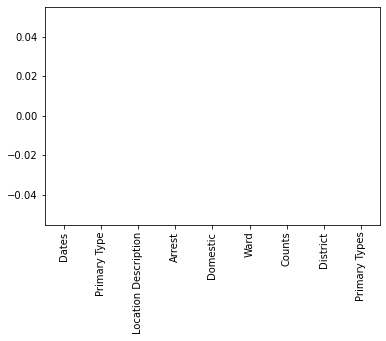

In [18]:
import matplotlib.pyplot as plt

df = pd.read_csv("data/Crimes_2015.csv")

# удаляем пустые строки
df.dropna(inplace=True, how='any')

# строим график распределения
df.isnull().sum().plot(kind='bar')

# сохраняем результат
plt.savefig('result.png')